In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv(r"C:\Users\madhu\Downloads\Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
df.drop(columns="Serial No.",inplace=True)

In [9]:
df.shape

(400, 8)

In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from keras import Sequential

In [21]:
model=Sequential()
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="linear"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss="mean_squared_error",optimizer="Adam")

In [23]:
history=model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=25)

Epoch 1/25

8/8 [==============================] - 1s 26ms/step - loss: 0.4111 - val_loss: 0.3908
Epoch 2/25
8/8 [==============================] - 0s 7ms/step - loss: 0.3566 - val_loss: 0.3386
Epoch 3/25
8/8 [==============================] - 0s 7ms/step - loss: 0.3030 - val_loss: 0.2867
Epoch 4/25
8/8 [==============================] - 0s 11ms/step - loss: 0.2506 - val_loss: 0.2359
Epoch 5/25
8/8 [==============================] - 0s 22ms/step - loss: 0.2013 - val_loss: 0.1885
Epoch 6/25
8/8 [==============================] - 0s 7ms/step - loss: 0.1573 - val_loss: 0.1464
Epoch 7/25
8/8 [==============================] - 0s 5ms/step - loss: 0.1178 - val_loss: 0.1136
Epoch 8/25
8/8 [==============================] - 0s 7ms/step - loss: 0.0889 - val_loss: 0.0888
Epoch 9/25
8/8 [==============================] - 0s 5ms/step - loss: 0.0682 - val_loss: 0.0725
Epoch 10/25
8/8 [==============================] - 0s 5ms/step - loss: 0.0546 - val_loss: 0.0626
Epoch 11/25
8/8 [==================

In [24]:
y_pred=model.predict(X_test_scaled)

3/3 [==============================] - 0s 2ms/step


In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test,y_pred)

0.21777364711333846

In [27]:
import matplotlib.pyplot as plt

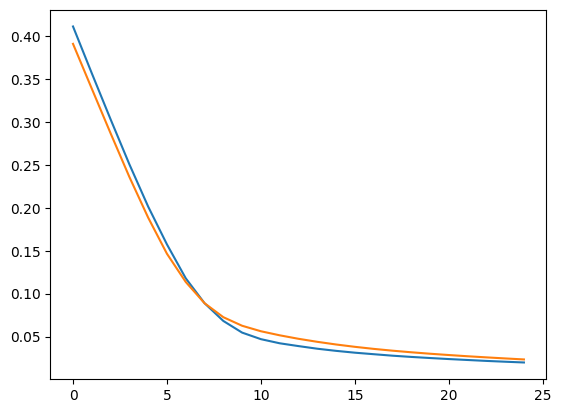

In [29]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])